<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/Best_Activation_function_for_sine_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate data
x0 = np.linspace(-2 * np.pi, 2 * np.pi, 200)  # 200 samples between -2π and 2π
y0 = np.sin(x0)
x = x0.reshape(-1, 1)  # Reshape x to be 2D
y = (y0 + np.random.uniform(-0.1, 0.1, x0.shape)).reshape(-1, 1)  # Add noise and reshape

# Build a model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # Hidden layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer
])
# Build and compile the model
model.compile(optimizer='adam', loss='mse')

num_epochs = 500
saved_predictions = {}  # Dictionary to store predictions

# Function-based callback for saving predictions
def save_predictions(epoch, logs):
    if (epoch + 1) % 50 == 1:
        saved_predictions[epoch + 1] = model.predict(x).flatten()
        print(f"Saved predictions at epoch {epoch + 1}")

# Train model
model.fit(x, y, epochs=num_epochs, verbose=0, callbacks=[
    tf.keras.callbacks.LambdaCallback(on_epoch_end=save_predictions)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Saved predictions at epoch 1
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Saved predictions at epoch 51
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Saved predictions at epoch 101
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Saved predictions at epoch 151
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 201
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 251
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 301
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 351
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 401
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Saved predictions at epoch 451


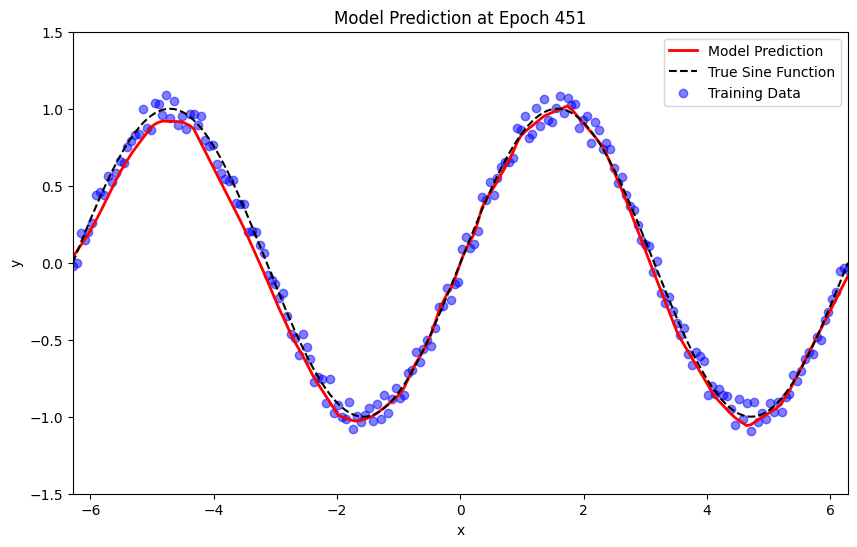

In [2]:
# Set up the animation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2, color="red", label="Model Prediction")
ax.plot(x0, y0, color="black", linestyle="--", label="True Sine Function")
ax.scatter(x, y, color="blue", alpha=0.5, label="Training Data")
ax.set_xlim(-2 * np.pi, 2 * np.pi)
ax.legend(); ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("x"); ax.set_ylabel("y")
ax.set_title("Animation of Model Learning Over Epochs")

# Animation update function
def update(frame):
  epoch = list(saved_predictions.keys())[frame]
  y_pred = saved_predictions[epoch]
  line.set_data(x, y_pred)  # Use the same x used for training
  ax.set_title(f"Model Prediction at Epoch {epoch}")
  return line,

# Create the animation
anim = FuncAnimation(fig, update, frames=len(saved_predictions), interval=500, blit=True)

# Display animation in Jupyter/Colab
HTML(anim.to_jshtml())


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate data
x0 = np.linspace(-2 * np.pi, 2 * np.pi, 200)  # 200 samples between -2π and 2π
y0 = np.sin(x0)
x = x0.reshape(-1, 1)  # Reshape x to be 2D
y = (y0 + np.random.uniform(-0.1, 0.1, x0.shape)).reshape(-1, 1)  # Add noise and reshape

# Build a model
model = Sequential([
    Dense(64, activation='tanh', input_shape=(1,)),  # Hidden layer
    Dense(1)  # Output layer
])
# Build and compile the model
model.compile(optimizer='adam', loss='mse')

num_epochs = 1000
saved_predictions = {}  # Dictionary to store predictions

# Function-based callback for saving predictions
def save_predictions(epoch, logs):
    if (epoch + 1) % 50 == 1:
        saved_predictions[epoch + 1] = model.predict(x).flatten()
        print(f"Saved predictions at epoch {epoch + 1}")

# Train model
model.fit(x, y, epochs=num_epochs, verbose=0, callbacks=[
    tf.keras.callbacks.LambdaCallback(on_epoch_end=save_predictions)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Saved predictions at epoch 1
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 51
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 101
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 151
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 201
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 251
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 301
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 351
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 401
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Saved predictions at epoch 451
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 501
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 551
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 601
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 651
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

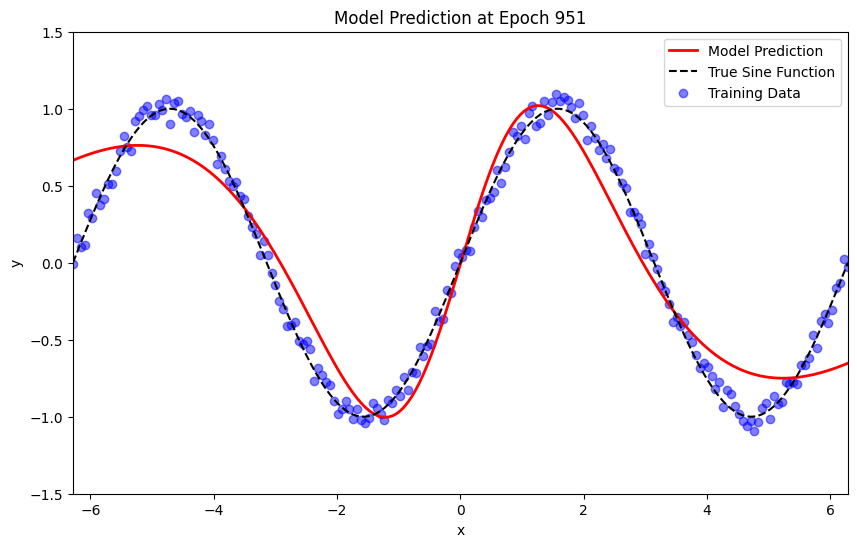

In [8]:
# Set up the animation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2, color="red", label="Model Prediction")
ax.plot(x0, y0, color="black", linestyle="--", label="True Sine Function")
ax.scatter(x, y, color="blue", alpha=0.5, label="Training Data")
ax.set_xlim(-2 * np.pi, 2 * np.pi)
ax.legend(); ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("x"); ax.set_ylabel("y")
ax.set_title("Animation of Model Learning Over Epochs")

# Animation update function
def update(frame):
  epoch = list(saved_predictions.keys())[frame]
  y_pred = saved_predictions[epoch]
  line.set_data(x, y_pred)  # Use the same x used for training
  ax.set_title(f"Model Prediction at Epoch {epoch}")
  return line,

# Create the animation
anim = FuncAnimation(fig, update, frames=len(saved_predictions), interval=500, blit=True)

# Display animation in Jupyter/Colab
HTML(anim.to_jshtml())


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate data
x0 = np.linspace(-2 * np.pi, 2 * np.pi, 200)  # 200 samples between -2π and 2π
y0 = np.sin(x0)
x = x0.reshape(-1, 1)  # Reshape x to be 2D
y = (y0 + np.random.uniform(-0.1, 0.1, x0.shape)).reshape(-1, 1)  # Add noise and reshape

# Build a model
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(1,)),  # Hidden layer
    Dense(1)  # Output layer
])
# Build and compile the model
model.compile(optimizer='adam', loss='mse')

num_epochs = 1000
saved_predictions = {}  # Dictionary to store predictions

# Function-based callback for saving predictions
def save_predictions(epoch, logs):
    if (epoch + 1) % 50 == 1:
        saved_predictions[epoch + 1] = model.predict(x).flatten()
        print(f"Saved predictions at epoch {epoch + 1}")

# Train model
model.fit(x, y, epochs=num_epochs, verbose=0, callbacks=[
    tf.keras.callbacks.LambdaCallback(on_epoch_end=save_predictions)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Saved predictions at epoch 1
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 51
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 101
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 151
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 201
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 251
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 301
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Saved predictions at epoch 351
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 401
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Saved predictions at epoch 451
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 501
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 551
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 601
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Saved predictions at epoch 651
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

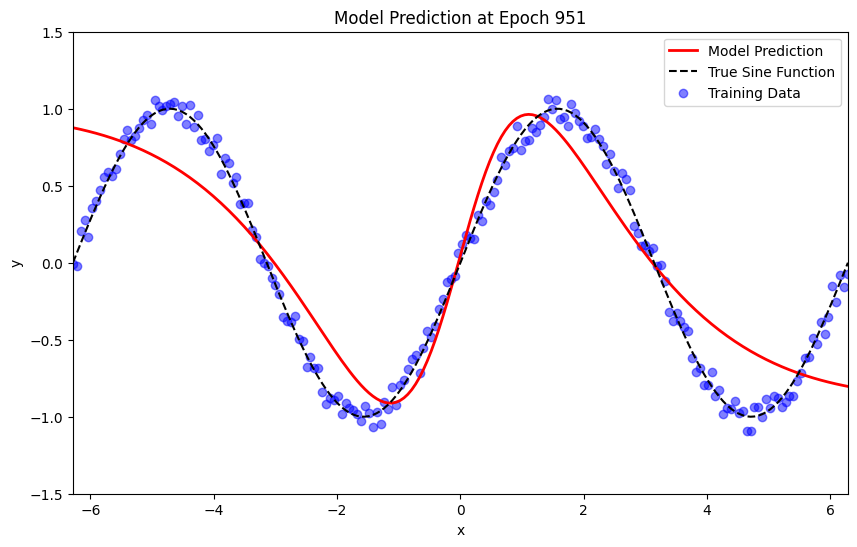

In [10]:
# Set up the animation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2, color="red", label="Model Prediction")
ax.plot(x0, y0, color="black", linestyle="--", label="True Sine Function")
ax.scatter(x, y, color="blue", alpha=0.5, label="Training Data")
ax.set_xlim(-2 * np.pi, 2 * np.pi)
ax.legend(); ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("x"); ax.set_ylabel("y")
ax.set_title("Animation of Model Learning Over Epochs")

# Animation update function
def update(frame):
  epoch = list(saved_predictions.keys())[frame]
  y_pred = saved_predictions[epoch]
  line.set_data(x, y_pred)  # Use the same x used for training
  ax.set_title(f"Model Prediction at Epoch {epoch}")
  return line,

# Create the animation
anim = FuncAnimation(fig, update, frames=len(saved_predictions), interval=500, blit=True)

# Display animation in Jupyter/Colab
HTML(anim.to_jshtml())
